## Heart Failure
### Análise Heart Failure


### Link
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

# Importando Módulos

In [110]:
#!pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import os
import kaggle
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Download Dados

In [111]:
def downloadKaggle(fName, pathFile,kaggleFile):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(fName, path=pathFile, unzip=True)
    dirname = os.path.abspath('')
    arquivo=dirname + '/../datasets/'+kaggleFile
    return arquivo

arquivo = downloadKaggle('andrewmvd/heart-failure-clinical-data','../datasets','heart_failure_clinical_records_dataset.csv')

# Análise Exploratória

In [112]:
df=pd.read_csv(arquivo,sep=',')

df.head(150)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,50.0,0,185,0,30,0,266000.00,0.70,141,1,1,112,0
146,52.0,0,132,0,30,0,218000.00,0.70,136,1,1,112,0
147,64.0,0,1610,0,60,0,242000.00,1.00,137,1,0,113,0
148,75.0,1,582,0,30,0,225000.00,1.83,134,1,0,113,1


In [113]:
# Verificando valores nulos
df.isnull().sum().sort_values(ascending=False)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [114]:
# Variáveis numéricas.
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [115]:
# Variáveis categóricas.
#df.describe(include=['O'])

In [116]:
# Número de DEATH_EVENT por sex.
# 
pd.crosstab(df['DEATH_EVENT'],df['sex'])


sex,0,1
DEATH_EVENT,,
0,71,132
1,34,62


In [117]:
pd.crosstab(df['DEATH_EVENT'],df['smoking'])

smoking,0,1
DEATH_EVENT,,
0,137,66
1,66,30


In [118]:
pd.crosstab(df['DEATH_EVENT'],df['diabetes'])

diabetes,0,1
DEATH_EVENT,,
0,118,85
1,56,40


In [119]:
# Info dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Dados de teste

In [120]:
# for machine learning we use the data directly (as relative pixel
# position info is ignored by this model)
X = df.drop('DEATH_EVENT',  axis='columns', inplace=False)
n_features = X.shape[1]

# the label to predict is the id of the person
y = df['DEATH_EVENT']
#target_names = ['not dead', 'dead']
#n_classes = target_names.shape[0]


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
train = pd.concat([X_train,y_train],axis=1)

# Visualização dos Dados

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

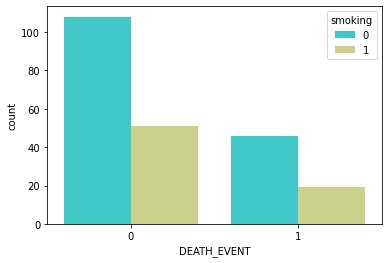

In [122]:
sns.countplot(x='DEATH_EVENT', hue='smoking', data=train, palette='rainbow')

Text(0.5, 1.0, 'Distribuição da idade')

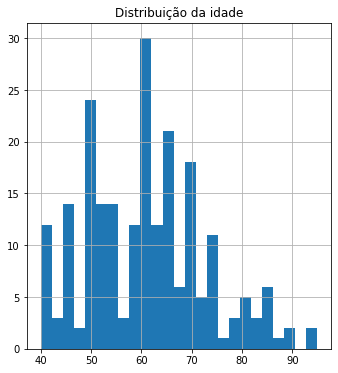

In [123]:
# Distribuição das idades.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = train.age.hist(bins=25)
fig.set_title('Distribuição da idade')

Text(0.5, 1.0, 'Distribuição do valor da Sodium')

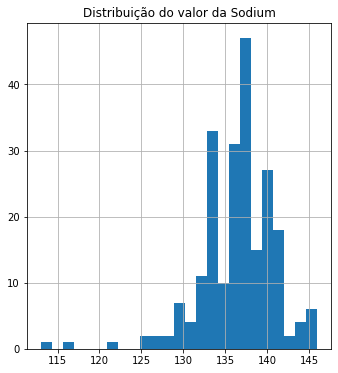

In [124]:
# Distribuição dos valores de Sodium.
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
fig = train.serum_sodium.hist(bins=25)
fig.set_title('Distribuição do valor da Sodium')

<AxesSubplot:>

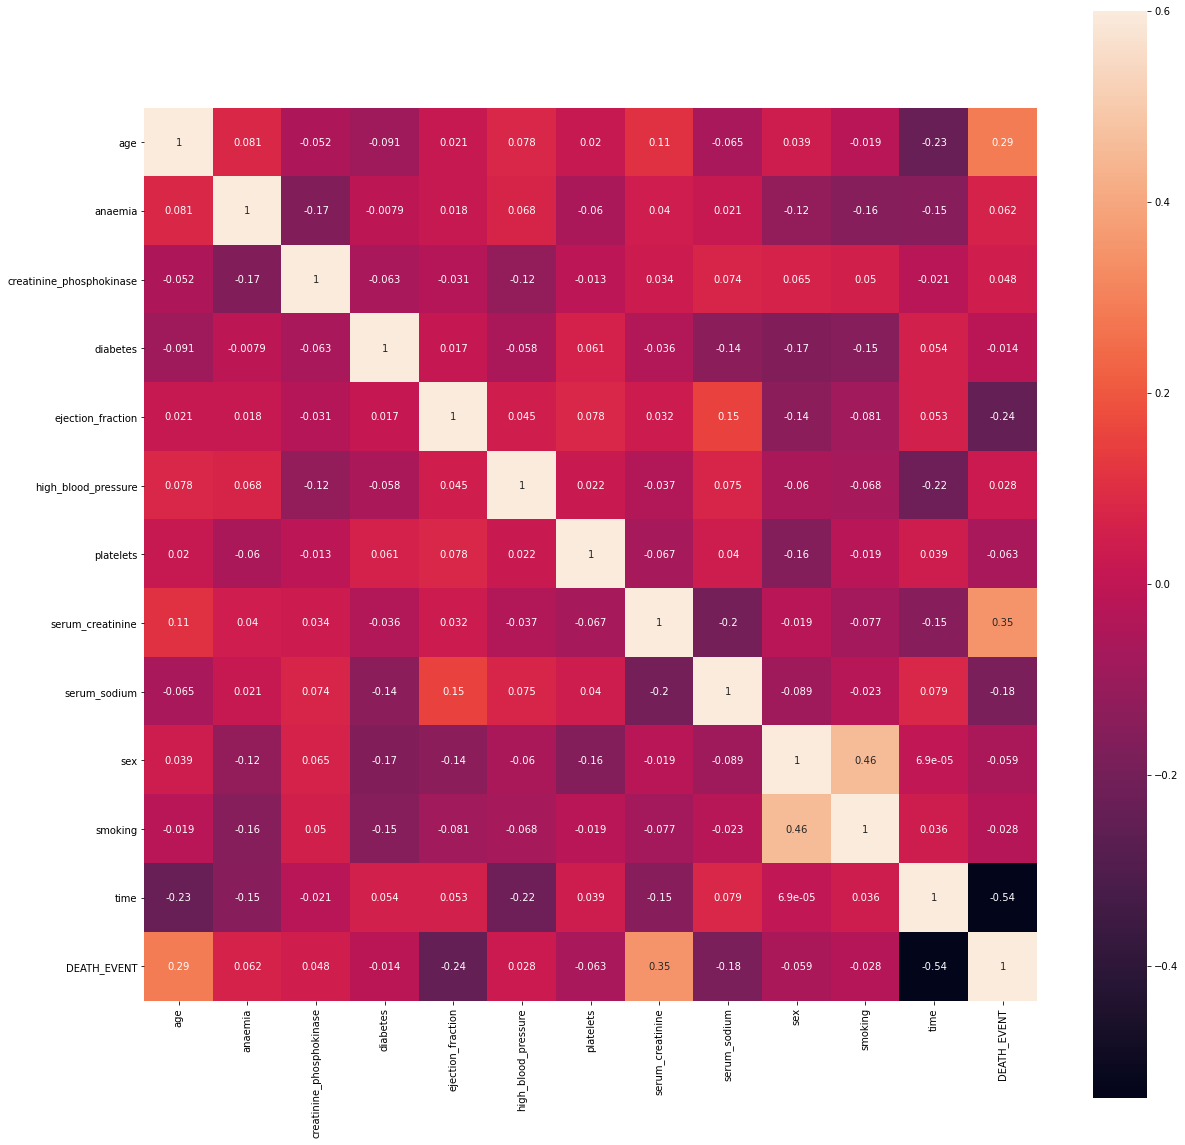

In [125]:
# Matriz de correlação.
# Possibilita a análise simultânea da associação entre variáveis.
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

# Tratamento dos Dados ausentes

# Modelos Preditivos

In [126]:
# Extração de variáveis com testes estatísticos univariados (Teste qui-quadrado)
f_score = chi2(X_train, y_train)
f_score

(array([4.27980335e+01, 4.99532333e-01, 8.13995363e+02, 2.55947498e-02,
        4.67702188e+01, 1.16154963e-01, 3.14430160e+04, 1.93955233e+01,
        1.09943174e+00, 2.92615124e-01, 1.19477504e-01, 2.98938826e+03]),
 array([6.06931421e-011, 4.79705683e-001, 4.88933607e-179, 8.72893999e-001,
        7.98171842e-012, 7.33242749e-001, 0.00000000e+000, 1.06255845e-005,
        2.94390848e-001, 5.88549551e-001, 7.29601871e-001, 0.00000000e+000]))

In [127]:
# Listando o P-values por variável
p_values = pd.Series(f_score[1])
p_values.index = X_train.columns
p_values.sort_values(ascending = False)

diabetes                     8.728940e-01
high_blood_pressure          7.332427e-01
smoking                      7.296019e-01
sex                          5.885496e-01
anaemia                      4.797057e-01
serum_sodium                 2.943908e-01
serum_creatinine             1.062558e-05
age                          6.069314e-11
ejection_fraction            7.981718e-12
creatinine_phosphokinase    4.889336e-179
platelets                    0.000000e+00
time                         0.000000e+00
dtype: float64

In [128]:
### Naive Bayes ###

# Abordagem probabilística (Teorema de Bayes)
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
prev_gaussian = gaussian.predict(X_test)
result_train = gaussian.score(X_train, y_train)
result_val = cross_val_score(gaussian,train.drop('DEATH_EVENT',axis=1), train['DEATH_EVENT'], cv=5).mean()
print(f'training score = {result_train}, while validation score = {result_val}')

training score = 0.8303571428571429, while validation score = 0.816868686868687


In [129]:
### Decision Tree ###

decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=7)
decision_tree.fit(X_train,y_train)
prev_tree = decision_tree.predict(X_test)
result_train = decision_tree.score(X_train, y_train)
result_val = cross_val_score(decision_tree,X_train, y_train, cv=5).mean()
print(f'training score = {result_train}, while validation score = {result_val}')

training score = 1.0, while validation score = 0.8035353535353537


In [130]:
### KNN ###

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn.fit(X_train,y_train)
prev_knn = knn.predict(X_test)
result_train = knn.score(X_train, y_train)
result_val = cross_val_score(decision_tree,X_train, y_train, cv=5).mean()
print(f'training score = {result_train}, while validation score = {result_val}')

taring score = 0.7544642857142857, while validation score = 0.8035353535353537


In [131]:
### Support vector machines (SVM) ###

svc = SVC(kernel = 'rbf', random_state = 7, C = 10.0, gamma='auto')
svc.fit(X_train,y_train)
previsoes = svc.predict(X_test)
result_train = svc.score(X_train, y_train)
result_val = cross_val_score(decision_tree,X_train, y_train, cv=5).mean()
print(f'training score = {result_train}, while validation score = {result_val}')

training score = 1.0, while validation score = 0.8035353535353537
